| **Inicio** | **atrás 14** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./14_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|

# **15. Matemáticas para el aprendizaje automático: PCA**

## **15.1 Análisis de componentes principales**

Podemos pensar en la reducción de la dimensionalidad como una forma de comprimir datos con cierta pérdida, similar a la de un jpg o un mp3. El análisis de componentes principales (ACP) es una de las técnicas de reducción de la dimensionalidad más fundamentales que se utilizan en el aprendizaje automático. En este módulo, utilizamos los resultados de los tres primeros módulos de este curso y derivamos el ACP desde un punto de vista geométrico. Dentro de este curso, este módulo es el más desafiante, y pasaremos por una derivación explícita de PCA además de algunos ejercicios de codificación que nos convertirán en un usuario competente de PCA.

### **15.1.1 Planteamiento del problema y objetivo del ACP**

El **Análisis de Componentes Principales (ACP)**, o Principal Component Analysis (PCA) en inglés, es una técnica estadística de reducción de dimensionalidad que se utiliza para simplificar la complejidad en conjuntos de datos de alta dimensión mientras se retiene la mayor cantidad posible de información. Esta técnica es fundamental en el análisis de datos para visualización, compresión de datos, y para mejorar la eficiencia en algoritmos de machine learning.

**Planteamiento del Problema en ACP**

En muchos campos, como la biología, finanzas, y ciencias sociales, los investigadores y analistas se enfrentan a conjuntos de datos con muchas variables. Cada variable representa una dimensión en el espacio de datos. Cuando las dimensiones aumentan, se hace más difícil visualizar, analizar, y interpretar los datos. Además, datos de alta dimensión a menudo están correlacionados, lo que lleva a redundancia. Aquí es donde el ACP se convierte en una herramienta valiosa.

El problema principal que aborda el ACP es la **"maldición de la dimensionalidad"**, la cual hace referencia a los diversos fenómenos que surgen cuando se analizan y organizan datos en espacios de alta dimensión que no ocurren en dimensiones inferiores, como overfitting en modelos de machine learning o enormes espacios vacíos en los datos que hacen que las distancias euclidianas pierdan su significado.

**Objetivo del ACP**

El objetivo principal del ACP es reducir la cantidad de dimensiones de un conjunto de datos, mientras se conserva la mayor cantidad de información posible. Esto se logra transformando las variables originales, correlacionadas entre sí, en un nuevo conjunto de variables que son linealmente independientes (ortogonales entre sí). Estas nuevas variables se llaman **componentes principales**.

Los objetivos específicos del ACP incluyen:

**Reducción de Dimensionalidad**: Simplificar los datos sin perder demasiada información, transformando las variables correlacionadas en un número menor de variables no correlacionadas.

**Visualización de Datos**: Permitir la visualización de datos multidimensionales en un espacio bidimensional o tridimensional.

**Identificación de Patrones**: Descubrir patrones en datos que no son aparentes en el espacio original de alta dimensión.

**Eliminación de Ruido**: Filtrar el ruido de los datos al reconstruirlos con los componentes principales.

**Optimización de Algoritmos**: Mejorar el rendimiento computacional y de almacenamiento en técnicas de modelado estadístico y machine learning.

**Ejemplo Ilustrativo con Gráfica**

Supongamos un conjunto de datos en 3D donde hay una clara correlación entre las variables. Aplicar ACP nos permitiría reducir este conjunto de 3D a 2D (o incluso 1D si es suficiente) para simplificar el análisis.

**Código en Python para Demostración del ACP**

Vamos a simular un conjunto de datos 3D y aplicar ACP para reducirlo a 2D.

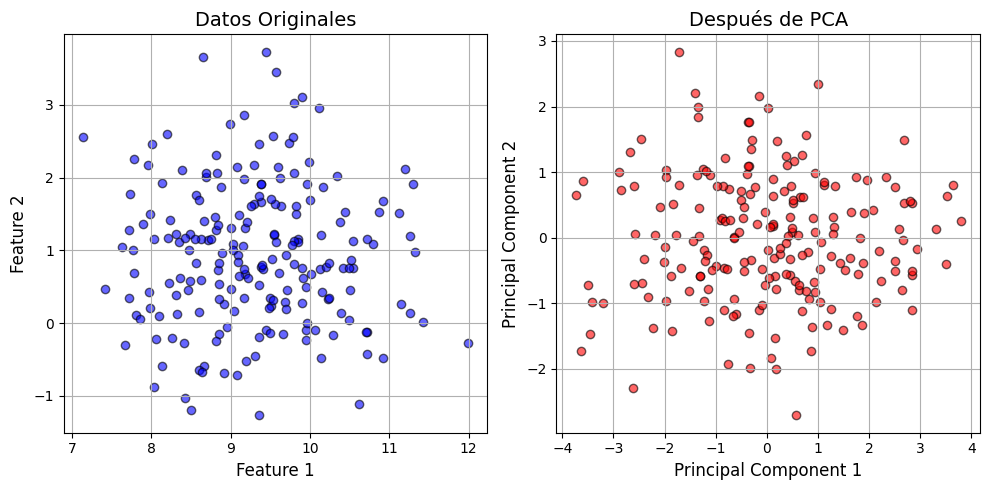

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generar datos simulados
X, _ = make_blobs(n_samples=200, centers=1, n_features=3, random_state=4)
X[:, 2] = X[:, 0] + X[:, 1]  # Crear correlación entre variables

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes
X_pca = pca.fit_transform(X)

# Visualizar los resultados
plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico para mejor visualización
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', edgecolor='k', alpha=0.6)
plt.title("Datos Originales", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red', edgecolor='k', alpha=0.6)
plt.title("Después de PCA", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

**Interpretación**

En el código anterior, generamos datos tridimensionales donde una de las dimensiones es una combinación lineal de las otras dos, lo que implica una fuerte correlación. Luego, utilizamos ACP para reducir la dimensión a dos, facilitando una visualización más sencilla y concentrando la mayor parte de la información en los dos primeros componentes principales.

Esta técnica de ACP es extremadamente útil en preprocesamiento de datos para análisis estadístico y aprendizaje automático, permitiendo resumir eficientemente la estructura subyacente de los datos en componentes menos numerosos pero más informativos.

### **15.1.2 Encontrar las coordenadas de los datos proyectados**

Encontrar las coordenadas de los datos proyectados implica calcular la representación de un conjunto de datos en un nuevo sistema de coordenadas, generalmente después de aplicar una transformación como la proyección sobre un subespacio. Este proceso es fundamental en muchas aplicaciones de ciencia de datos, incluyendo reducción de dimensionalidad y análisis de componentes principales (ACP).

**Concepto de Proyección y Coordenadas Proyectadas**

Cuando proyectamos datos sobre un subespacio, como en el ACP, transformamos los datos de su espacio original (de alta dimensión) a un nuevo espacio (de menor dimensión) definido por los componentes principales. Las coordenadas de los datos proyectados en este nuevo espacio representan las posiciones de los puntos de datos originales en términos de las direcciones que capturan la mayor varianza (en el caso del ACP).

**Fórmula de Proyección**

Si tenemos una matriz de datos $(X)$ de tamaño $(n \times p)$ (con $(n)$ observaciones y $(p)$ variables) y queremos proyectarla sobre un subespacio definido por $(k)$ componentes principales, podemos usar la matriz de carga $(P)$ de tamaño $(p \times k)$ que contiene los vectores propios correspondientes a los $(k)$ mayores valores propios. La matriz de datos proyectados $(Y)$ en el nuevo subespacio es calculada como:

$Y = X P$

donde $(Y)$ tiene dimensiones $(n \times k)$, representando las nuevas coordenadas de los datos proyectados en el subespacio de los componentes principales.

**Ejemplo Ilustrativo**

Supongamos que tenemos un conjunto de datos 3D y queremos proyectarlo en un plano 2D usando ACP.

**Código en Python para Demostración**

Aquí está cómo podríamos calcular y visualizar las coordenadas de datos proyectados en Python usando `scikit-learn` para realizar ACP:

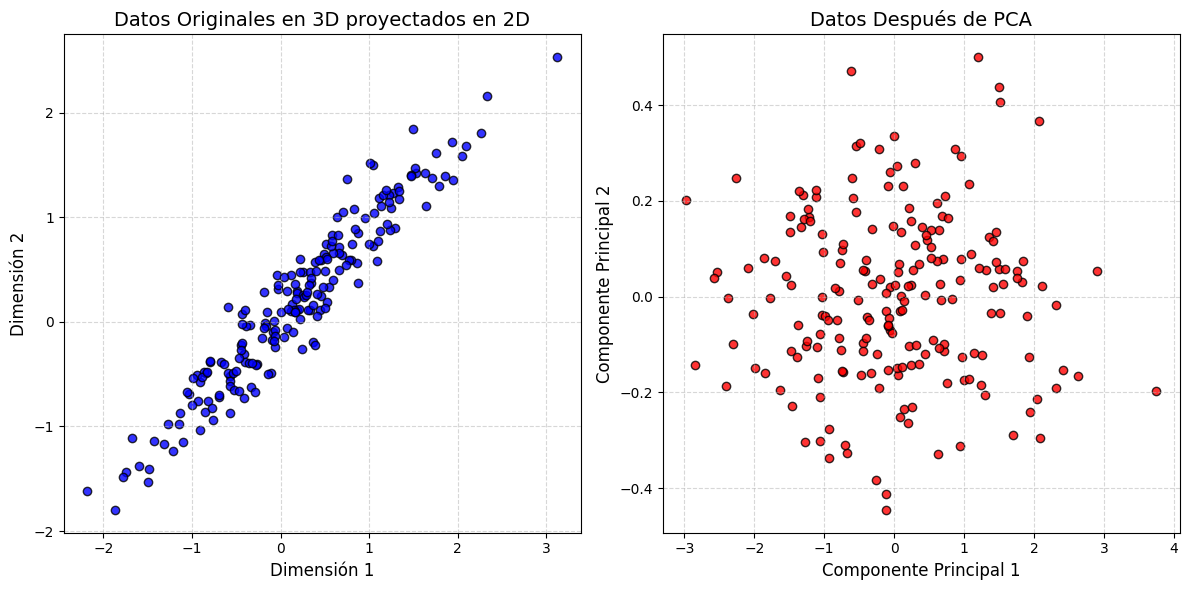

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simular datos en 3D
np.random.seed(0)
original_data = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

# Añadir algo de ruido
noise = np.random.rand(200, 2) * 0.5
original_data += noise

# Aplicar PCA para reducir a 2D
pca = PCA(n_components=2)
projected_data = pca.fit_transform(original_data)

# Mostrar los datos originales y proyectados
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Configuración de visualización para los datos originales
ax[0].scatter(original_data[:, 0], original_data[:, 1], alpha=0.8, edgecolor='black', facecolor='blue', label='Original Data')
ax[0].set_title("Datos Originales en 3D proyectados en 2D", fontsize=14)
ax[0].set_xlabel("Dimensión 1", fontsize=12)
ax[0].set_ylabel("Dimensión 2", fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.5)

# Configuración de visualización para los datos después de PCA
ax[1].scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.8, edgecolor='black', facecolor='red', label='PCA Data')
ax[1].set_title("Datos Después de PCA", fontsize=14)
ax[1].set_xlabel("Componente Principal 1", fontsize=12)
ax[1].set_ylabel("Componente Principal 2", fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Interpretación**

- **Visualización**: El primer gráfico muestra una vista de dos dimensiones de los datos tridimensionales originales, mientras que el segundo gráfico muestra las coordenadas de los mismos datos después de ser proyectados sobre los dos principales componentes encontrados por el ACP.

- **Transformación**: ACP identifica las direcciones (componentes principales) a lo largo de las cuales la varianza de los datos es máxima, y proyecta los datos en estas direcciones, reduciendo así la dimensión mientras intenta retener la mayor cantidad de información posible.

Esta técnica es esencial para simplificar datos complejos, mejorar algoritmos de aprendizaje automático, y facilitar la visualización y análisis de grandes conjuntos de datos.

### **15.1.3 Reformulación del objetivo**

La "Reformulación del Objetivo" en el contexto del análisis de datos y el aprendizaje automático a menudo implica redefinir o ajustar los objetivos de un modelo o método para optimizar el rendimiento, mejorar la interpretación, o adaptarse mejor a los requisitos de un problema específico. Este proceso es esencial cuando los objetivos iniciales no son completamente adecuados para las necesidades del proyecto o cuando se descubre nueva información que impacta los objetivos originales.

**Ejemplo Práctico: Análisis de Componentes Principales (ACP)**

Para ilustrar cómo se puede reformular el objetivo de un método estadístico, consideremos el Análisis de Componentes Principales (ACP), que comúnmente se utiliza para reducción de dimensionalidad. La formulación original del objetivo en ACP puede ser "reducir la dimensionalidad de los datos preservando la mayor varianza posible". Sin embargo, esta formulación puede necesitar ajustes dependiendo del contexto específico o de las necesidades de interpretación.

**Objetivo Original de ACP**

El objetivo principal del ACP es transformar un conjunto de datos con variables posiblemente correlacionadas en un conjunto de valores de variables no correlacionadas llamadas componentes principales. Esto se hace de manera que el primer componente principal tenga la mayor varianza posible (es decir, capte la mayor cantidad de información sobre la estructura de los datos), y cada componente subsiguiente, en orden de extracción, tenga la mayor varianza posible bajo la restricción de que sea ortogonal a los componentes anteriores.

**Reformulación del Objetivo**

En algunos casos, es posible que queramos reformular este objetivo para centrarnos en otros aspectos, como:

**Minimizar la pérdida de información en las proyecciones de menor dimensión**: En lugar de simplemente maximizar la varianza capturada, el objetivo podría centrarse en minimizar la distancia de reconstrucción entre los datos originales y su proyección.

**Mejorar la interpretabilidad de los componentes**: Algunas veces, los primeros componentes principales, aunque capturan la mayoría de la varianza, pueden ser difíciles de interpretar. Podríamos reformular el objetivo para buscar componentes que no solo capturen varianza sino que también tengan significados claros en términos de las variables originales.

**Ejemplo con Código Python**

Vamos a realizar ACP en un conjunto de datos simulado y luego mostrar cómo se podría reformular el objetivo para centrarse en la interpretabilidad.

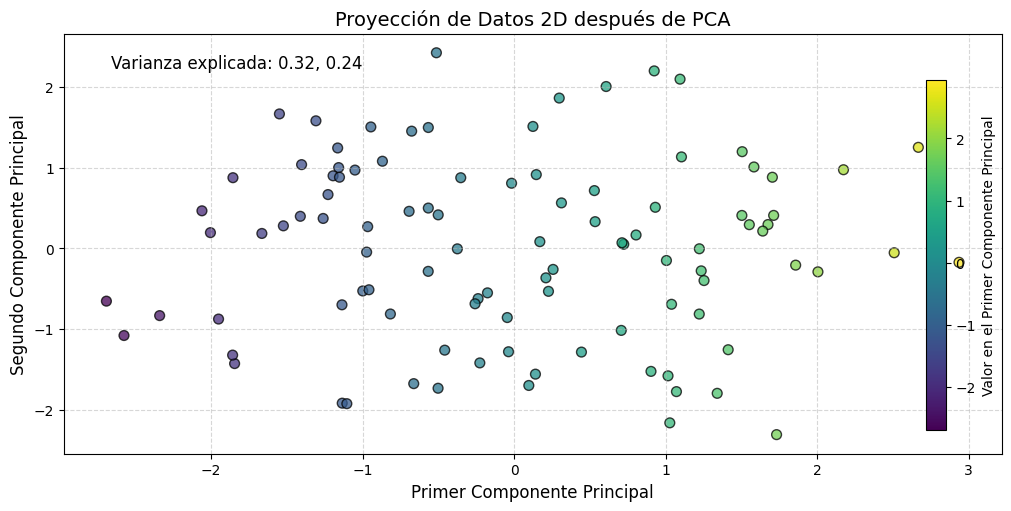

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import Normalize

# Datos simulados
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 observaciones, 5 características
X[:, 2] += 0.5 * X[:, 0]  # Crear correlación entre características

# Estandarización de los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Configurar la figura para usar constrained_layout
plt.figure(figsize=(10, 5), constrained_layout=True)
cmap = plt.cm.viridis  # Elegir un mapa de colores
norm = Normalize(vmin=np.min(X_pca[:, 0]), vmax=np.max(X_pca[:, 0]))
colors = cmap(norm(X_pca[:, 0]))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, edgecolor='k', alpha=0.75, s=50)
plt.title("Proyección de Datos 2D después de PCA", fontsize=14)
plt.xlabel("Primer Componente Principal", fontsize=12)
plt.ylabel("Segundo Componente Principal", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(0.05, 0.95, f"Varianza explicada: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f}",
         horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, color='black', fontsize=12)

# Crear un eje para la colorbar
cb_ax = plt.gcf().add_axes([0.92, 0.15, 0.02, 0.7])  # Ajusta estas coordenadas según necesites
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cb_ax, label='Valor en el Primer Componente Principal')

plt.show()

**Interpretación y Reformulación**

En el código proporcionado, realizamos ACP en un conjunto de datos con variables correlacionadas y proyectamos estos datos en dos dimensiones. Si bien esto es efectivo para reducción de dimensionalidad, podríamos reformular el objetivo para mejorar la interpretabilidad mediante técnicas de rotación de componentes, lo cual puede ayudar a hacer que cada componente principal represente mejor variables específicas, facilitando así su interpretación en contextos prácticos.

Este tipo de reformulación es esencial cuando se desea adaptar métodos estadísticos a necesidades específicas de proyectos o cuando se busca mejorar la utilidad práctica de los resultados analíticos.

### **15.1.4 Encontrar los vectores base que abarcan el subespacio principal**

Encontrar los vectores base que abarcan el subespacio principal es una tarea central en el Análisis de Componentes Principales (ACP). El objetivo es identificar las direcciones en las que los datos varían más, lo cual es útil para reducir la dimensionalidad, mejorar la visualización y descubrir las características subyacentes más influyentes de los datos.

**Concepto de Vectores Base en el Subespacio Principal**

En ACP, los vectores base que abarcan el subespacio principal son conocidos como **vectores propios** o **eigenvectors**, y las direcciones que identifican se llaman **componentes principales**. Estos vectores propios se calculan de la matriz de covarianza de los datos o, más comúnmente en práctica, de la matriz de correlaciones para estandarizar las escalas de las variables.

**Cómo se Calculan los Vectores Propios**

**Matriz de Covarianza**: Primero, calculamos la matriz de covarianza $(\Sigma)$ de los datos, que mide cómo cambian conjuntamente las variables. Para un conjunto de datos $(X)$ de dimensiones $(n \times p)$ (donde $(n)$ es el número de muestras y $(p)$ el número de características), la matriz de covarianza es:

   $\Sigma = \frac{1}{n-1} X^T X$

**Vectores Propios y Valores Propios**: Luego, encontramos los vectores propios y los valores propios de la matriz de covarianza. Los vectores propios son los vectores base del subespacio principal, y los valores propios indican la varianza de los datos a lo largo de estas direcciones. Los componentes principales son los vectores propios ordenados de acuerdo a sus valores propios correspondientes, de mayor a menor.

**Ejemplo con Cálculo**

Supongamos que tenemos un conjunto de datos con tres variables y queremos encontrar los dos principales componentes.

**Datos Simulados**

Consideremos un conjunto de datos 3D simple generado para el ejemplo.

**Código en Python para el Ejemplo**

A continuación, el código en Python utiliza `numpy` y `matplotlib` para generar datos, calcular la matriz de covarianza, y encontrar los vectores propios.

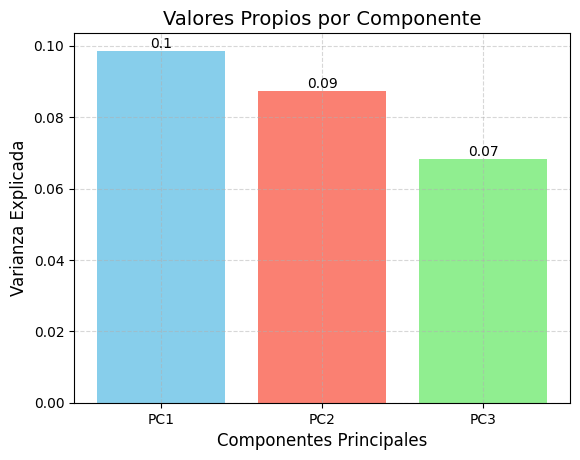

Vectores propios (componentes principales):
[[-0.73808145 -0.4567562  -0.49659797]
 [ 0.31242029 -0.88371847  0.34847559]
 [-0.59802118  0.10205609  0.79495611]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos simulados
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 observaciones, 3 características

# Centrar los datos (importante para calcular la matriz de covarianza)
X_centered = X - np.mean(X, axis=0)

# Calcular la matriz de covarianza
cov_matrix = np.cov(X_centered, rowvar=False)

# Encontrar vectores propios y valores propios
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Ordenar los vectores propios por valores propios descendentes
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Visualizar los dos primeros vectores propios
fig, ax = plt.subplots()
colors = ['skyblue', 'salmon', 'lightgreen']  # Colores para cada componente
bars = ax.bar(range(1, 4), sorted_eigenvalues, color=colors)
ax.set_title('Valores Propios por Componente', fontsize=14)
ax.set_xlabel('Componentes Principales', fontsize=12)
ax.set_ylabel('Varianza Explicada', fontsize=12)
ax.set_xticks(range(1, 4))  # Asegurarse de que los ticks corresponden a los componentes correctos
ax.set_xticklabels(['PC1', 'PC2', 'PC3'])
ax.grid(True, linestyle='--', alpha=0.5)

# Añadir etiquetas sobre cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()

print("Vectores propios (componentes principales):")
print(sorted_eigenvectors)

**Interpretación**

- **Matriz de Covarianza**: Calculamos la matriz de covarianza de los datos centrados para entender cómo varían conjuntamente las características.
- **Vectores y Valores Propios**: Los vectores propios nos dan las direcciones de máxima varianza (los subespacios principales), y los valores propios asociados indican cuánta varianza hay en esas direcciones.
- **Visualización**: El gráfico de barras muestra la varianza explicada por cada componente principal, destacando la importancia de cada uno.

Este enfoque permite reducir la dimensionalidad del conjunto de datos original proyectándolo sobre los subespacios definidos por los vectores propios más significativos, lo cual puede facilitar análisis posteriores y visualizaciones más eficientes.

### **15.1.5 Pasos del ACP**

El Análisis de Componentes Principales (ACP) es una técnica de reducción de dimensionalidad que se utiliza para simplificar la complejidad en conjuntos de datos de alta dimensión. Es fundamental en campos como machine learning, estadística, y ciencia de datos para visualización, compresión de datos y preprocesamiento antes de aplicaciones analíticas.

**Pasos del ACP**

El ACP transforma un conjunto de variables posiblemente correlacionadas en un número menor de variables no correlacionadas llamadas componentes principales. Los pasos básicos para realizar ACP son:

**1. Estandarización de los Datos**

Dado que el ACP es afectado por la escala de las variables, el primer paso es estandarizar las variables para que tengan media 0 y desviación estándar 1. Esto es importante especialmente cuando las variables originales tienen diferentes unidades de medida.

**2. Cálculo de la Matriz de Covarianza**

Después de estandarizar los datos, calculamos la matriz de covarianza. Las entradas de esta matriz proporcionan las covarianzas (medidas de cómo cambian conjuntamente dos variables) entre cada par de variables del conjunto de datos.

**3. Cálculo de los Vectores Propios y los Valores Propios**

El siguiente paso es calcular los vectores propios y los valores propios de la matriz de covarianza. Los valores propios indican la cantidad de varianza que se puede atribuir a cada vector propio, y los vectores propios definen las direcciones de los nuevos ejes de datos.

**4. Ordenar los Vectores Propios**

Los vectores propios se ordenan por los valores propios en orden descendente para priorizar las principales componentes. Esto significa que el primer vector propio corresponde a la dirección de máxima varianza, y así sucesivamente.

**5. Proyección de los Datos**

Finalmente, los datos originales se proyectan sobre el espacio definido por los vectores propios seleccionados. Esto transforma los datos al nuevo sistema de coordenadas, reduciendo la cantidad de dimensiones y destacando la estructura más significativa de los datos.

**Ejemplo con Código Python**

A continuación, se muestra cómo realizar estos pasos utilizando un conjunto de datos simulado en Python:

Componentes principales (vectores propios):
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Varianza explicada (valores propios):
[1.9957275  0.01432275]


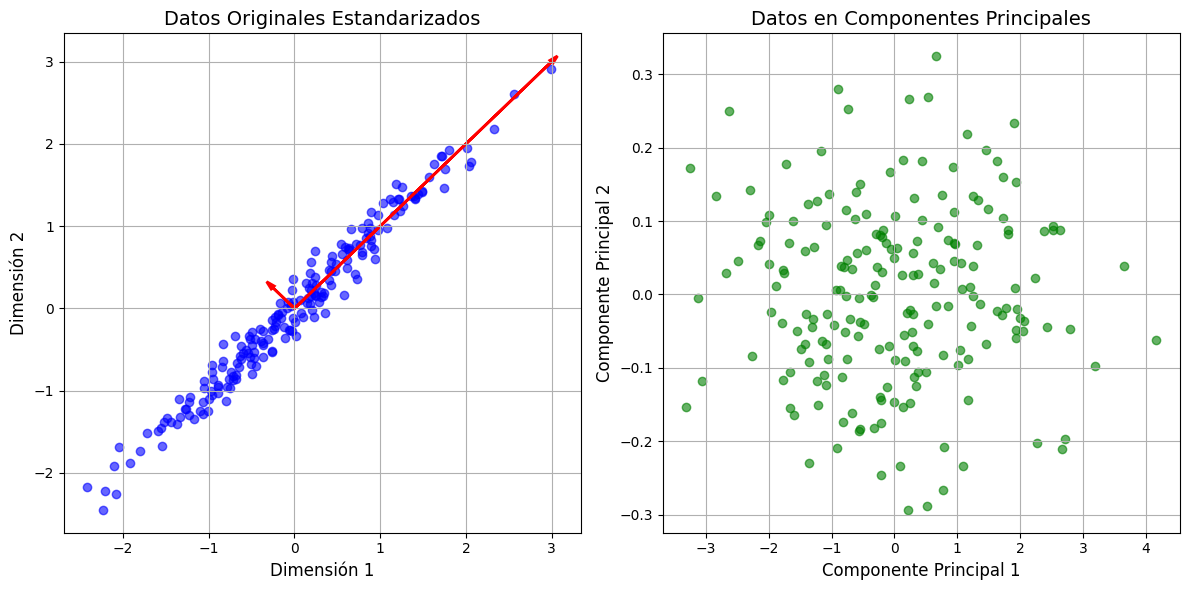

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generar datos simulados
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

# 1. Estandarización de los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 2. Aplicar PCA
pca = PCA(n_components=2)
pca.fit(X_std)

# 3. Los componentes principales y la varianza explicada
print("Componentes principales (vectores propios):")
print(pca.components_)
print("Varianza explicada (valores propios):")
print(pca.explained_variance_)

# 4. Transformar los datos al espacio de los componentes principales
X_pca = pca.transform(X_std)

# 5. Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Datos originales estandarizados con vectores propios
axes[0].scatter(X_std[:, 0], X_std[:, 1], alpha=0.6, color='blue')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    axes[0].arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
axes[0].set_title("Datos Originales Estandarizados", fontsize=14)
axes[0].set_xlabel("Dimensión 1", fontsize=12)
axes[0].set_ylabel("Dimensión 2", fontsize=12)
axes[0].grid(True)

# Datos en componentes principales
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color='green')
axes[1].set_title("Datos en Componentes Principales", fontsize=14)
axes[1].set_xlabel("Componente Principal 1", fontsize=12)
axes[1].set_ylabel("Componente Principal 2", fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Interpretación**

- **Estandarización**: Los datos originales se estandarizan para asegurar que el ACP no esté sesgado por la escala de las variables.
- **ACP**: Se calculan los componentes principales y se observa cuánta varianza explica cada uno.
- **Visualización**: Los gráficos muestran los datos antes y después de aplicar ACP, destacando cómo el ACP captura la esencia de los datos al maximizar la varianza en las primeras componentes.

Este proceso simplifica los datos, facilitando su análisis y ayudando a descubrir patrones ocultos que no son evidentes en el espacio original de alta dimensionalidad.

### **15.1.6 PCA en altas dimensiones**

El **Análisis de Componentes Principales (PCA)** en altas dimensiones es una técnica estadística poderosa usada para reducir la dimensionalidad de grandes conjuntos de datos, simplificando la estructura de los datos mientras retiene las características más informativas. Es especialmente útil en contextos donde las dimensiones de los datos son tan grandes que los métodos analíticos tradicionales se vuelven ineficaces o ineficientes, como en la bioinformática, análisis de imágenes y aprendizaje automático con grandes volúmenes de datos.

**Concepto de PCA en Altas Dimensiones**

En entornos de alta dimensión, los datos pueden incluir miles de dimensiones (variables), muchas de las cuales podrían estar correlacionadas. PCA busca transformar este conjunto de datos original con dimensiones potencialmente correlacionadas en un conjunto de valores de dimensiones reducidas que son linealmente independientes (los componentes principales), ordenados por la cantidad de varianza original que cada uno captura.

**Pasos del PCA en Altas Dimensiones**

Los pasos para realizar PCA en contextos de alta dimensionalidad son conceptualmente los mismos que en cualquier aplicación de PCA, aunque el tamaño de los datos puede requerir consideraciones computacionales especiales:

**Estandarización de Datos**: Convertir los datos para que tengan una media de cero y una varianza de uno en cada dimensión. Esto es crucial porque PCA es sensible a las variaciones en la escala de los datos.

**Construcción de la Matriz de Covarianza**: Calcular la matriz de covarianza de los datos estandarizados. En contextos de alta dimensión, esta matriz será de tamaño $(p \times p)$ donde $(p)$ es el número de variables, lo cual puede ser muy grande.

**Descomposición de Eigen**: Calcular los vectores y valores propios de la matriz de covarianza. Los vectores propios representan las direcciones de los componentes principales, y los valores propios indican la cantidad de varianza capturada por cada componente.

**Selección de Componentes Principales**: Seleccionar un subconjunto de componentes principales que capturen una cantidad suficiente de la varianza total, según algún criterio, como el porcentaje acumulado de la varianza.

**Transformación de Datos**: Proyectar los datos originales en el espacio definido por los componentes principales seleccionados para obtener los datos reducidos en dimensiones.

**Ejemplo con Código Python**

Vamos a simular un ejemplo donde un conjunto de datos tiene un alto número de dimensiones y aplicaremos PCA para reducir su dimensionalidad.

Original number of features: 300
Reduced number of features: 83


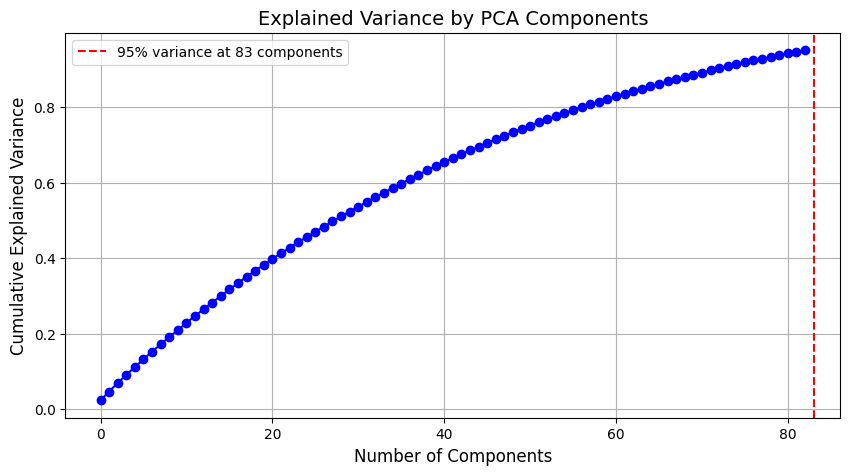

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generar datos simulados en alta dimensión
np.random.seed(0)
n_samples = 100
n_features = 300  # Alta dimensionalidad

# Simular datos
data = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
data += np.random.normal(loc=0, scale=0.1, size=(n_samples, n_features)) * np.arange(n_features)

# Estandarizar los datos
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
data_reduced = pca.fit_transform(data_std)

# Resultados
print(f"Original number of features: {n_features}")
print(f"Reduced number of features: {data_reduced.shape[1]}")

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.grid(True)

# Añadir una línea vertical en el número de componentes que explica el 95% de la varianza
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% variance at {n_components_95} components')
plt.legend()

plt.show()

**Interpretación**

- **Datos Simulados**: Generamos datos de alta dimensión donde las variables tienen correlaciones estructuradas.
- **PCA**: Reducimos las dimensiones conservando el 95% de la varianza original. La reducción significativa en el número de dimensiones facilita análisis posteriores y visualizaciones.
- **Gráfico de Varianza**: El gráfico muestra cuántos componentes son necesarios para capturar diferentes porcentajes de la varianza total, ayudando a decidir cuántas dimensiones retener.

Este enfoque es fundamental en la gestión de grandes conjuntos de datos, permitiendo análisis más eficientes y menos costosos computacionalmente.

### **15.1.7 Otras interpretaciones del ACP**

El Análisis de Componentes Principales (PCA) es una técnica estadística poderosa y versátil, utilizada no solo para la reducción de la dimensionalidad, sino que también tiene varias otras interpretaciones y aplicaciones en diferentes campos. Aquí exploraremos algunas de estas interpretaciones alternativas del ACP.

**Interpretaciones del ACP**

**1. Maximización de la Varianza**

La interpretación más común del ACP es que busca maximizar la varianza de los datos proyectados. Matemáticamente, si consideramos una transformación lineal de los datos originales $(X)$ a través de una matriz de transformación $(P)$ (donde las columnas de $(P)$ son los vectores propios de la matriz de covarianza de $(X)$), el ACP busca maximizar la varianza de los datos transformados $(Y = XP)$.

**2. Minimización del Error Cuadrático**

Otra interpretación del ACP es que minimiza el error cuadrático entre los datos originales y su reconstrucción a partir de un número reducido de componentes. Esto es, minimiza la suma de los cuadrados de las distancias (errores) entre los datos originales y sus proyecciones sobre el subespacio definido por los componentes principales.

**3. Descomposición de la Matriz de Datos**

El ACP también se puede ver como una forma de descomposición de la matriz de datos $(X)$ en un producto de dos matrices: una matriz de cargas (o pesos) que contiene los vectores propios y una matriz de puntuaciones que contiene las coordenadas de los datos originales en el nuevo espacio de componentes principales. Esto es similar a otras descomposiciones matriciales como la descomposición de valores singulares (SVD).

**4. Filtrado de Ruido**

En aplicaciones de procesamiento de señales y de imágenes, el ACP es usado para filtrar ruido. Los componentes principales que tienen valores propios pequeños y que probablemente representen ruido se pueden descartar, mientras que los componentes que capturan la mayoría de la varianza (y por tanto la "señal" útil) se retienen.

**Ejemplo Ilustrativo**

Vamos a ilustrar el concepto de minimización del error cuadrático en el contexto de ACP, usando un conjunto de datos bidimensional generado.

**Código en Python y Visualización**

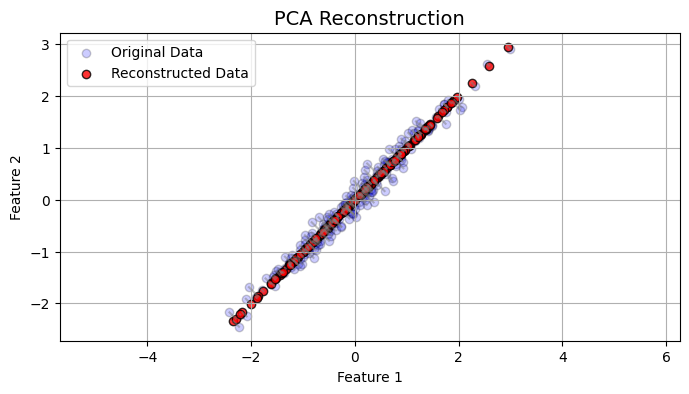

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generar datos bidimensionales
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=1)  # Reducir a 1 componente principal
X_pca = pca.fit_transform(X_std)
X_new = pca.inverse_transform(X_pca)  # Reconstruir los datos desde los componentes

# Visualización de los datos originales y reconstruidos
plt.figure(figsize=(8, 4))
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2, color='blue', label='Original Data', edgecolor='black')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='red', label='Reconstructed Data', edgecolor='black')

# Añadir líneas entre puntos originales y reconstruidos
for i in range(len(X_std)):
    plt.plot([X_std[i, 0], X_new[i, 0]], [X_std[i, 1], X_new[i, 1]], 'gray', alpha=0.5)

plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA Reconstruction', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Interpretación**

- **Datos Originales vs Reconstruidos**: La visualización muestra los datos originales y su reconstrucción utilizando un solo componente principal. La reconstrucción captura la dirección principal de la variabilidad de los datos, reduciendo el error cuadrático entre los puntos originales y proyectados.

Esta representación ilustra cómo el ACP no solo reduce la dimensionalidad, sino que también simplifica la estructura de los datos, haciendo énfasis en las características más significativas y minimizando el impacto de las variaciones menos importantes.

### **15.1.8 Espacios vectoriales**

Los **espacios vectoriales** son uno de los conceptos fundamentales en álgebra lineal y desempeñan un papel crucial en diversas áreas de las matemáticas y la física, incluyendo análisis funcional, mecánica cuántica, y optimización, entre otras. Un espacio vectorial (también llamado espacio lineal) es una colección de vectores, que son objetos que pueden ser sumados entre sí y multiplicados ("escalados") por números, conocidos como escalares en este contexto.

**Definición de Espacio Vectorial**

Un espacio vectorial sobre un campo $(F)$ (generalmente los números reales $(\mathbb{R})$ o los números complejos $(\mathbb{C})$) es un conjunto $(V)$ junto con dos operaciones:

**Suma de vectores**: $(+ : V \times V \rightarrow V)$ que asigna a cada par de vectores $(\mathbf{u}, \mathbf{v} \in V)$ un tercer vector $(\mathbf{u} + \mathbf{v} \in V)$.

**Multiplicación por escalares**: $(\cdot : F \times V \rightarrow V)$ que asigna a cada escalar $(c \in F)$ y cada vector $(\mathbf{v} \in V)$ un vector $(c \mathbf{v} \in V)$.

Estas operaciones deben cumplir diez axiomas que incluyen la conmutatividad, asociatividad, y distributividad, entre otros.

**Propiedades de los Espacios Vectoriales**

Un espacio vectorial incluye siempre el **vector cero** $(\mathbf{0})$, que es un elemento neutro para la suma de vectores, y cada vector $(\mathbf{v})$ en el espacio tiene un **vector inverso** $(-\mathbf{v})$ tal que $(\mathbf{v} + (-\mathbf{v}) = \mathbf{0})$.

**Ejemplos de Espacios Vectoriales**

**$(\mathbb{R}^n)$**: El conjunto de todos los vectores de $(n)$-tuplas de números reales es un espacio vectorial con la suma usual de vectores y la multiplicación usual por escalares.

**Espacios de Funciones**: El conjunto de todas las funciones reales definidas en el intervalo $[a, b]$ es un espacio vectorial donde la suma y la multiplicación por escalares se definen punto a punto.

**Matrices**: El conjunto de todas las matrices de $(m \times n)$ sobre $(\mathbb{R})$ forma un espacio vectorial bajo las operaciones de suma de matrices y multiplicación por escalares.

**Código en Python para Demostración**

Aquí, vamos a demostrar cómo se pueden manipular vectores en Python usando la librería NumPy, que facilita el trabajo con operaciones de espacios vectoriales:

In [8]:
import numpy as np

# Definir dos vectores en R^2
v1 = np.array([1, 2])
v2 = np.array([3, 4])

# Suma de vectores
sum_v = v1 + v2

# Multiplicación por un escalar
scalar_mul = 3 * v1

# Visualizar los resultados
print("Vector v1:", v1)
print("Vector v2:", v2)
print("Suma v1 + v2:", sum_v)
print("3 * v1:", scalar_mul)

Vector v1: [1 2]
Vector v2: [3 4]
Suma v1 + v2: [4 6]
3 * v1: [3 6]


**Visualización de Operaciones Vectoriales**

Aunque el código anterior es suficiente para operaciones simples, vamos a visualizar la suma de dos vectores en un plano bidimensional para una mejor interpretación geométrica:

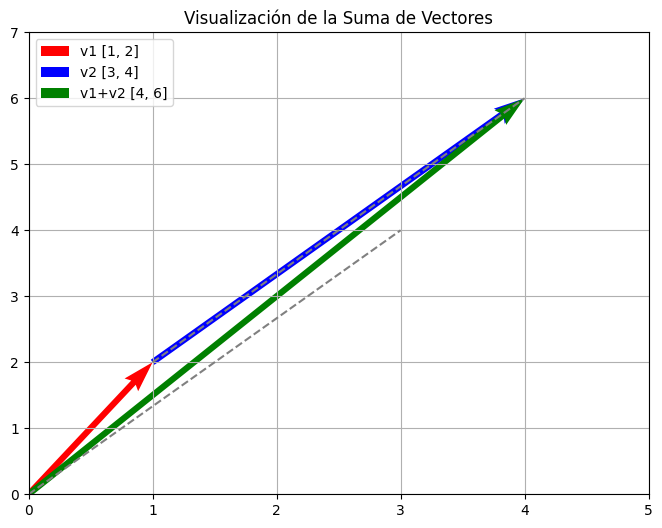

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Definir vectores
v1 = np.array([1, 2])
v2 = np.array([3, 4])
sum_v = v1 + v2

# Graficar vectores
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', label='v1 [1, 2]', width=0.01)
plt.quiver(v1[0], v1[1], v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v2 [3, 4]', width=0.01)
plt.quiver(0, 0, sum_v[0], sum_v[1], angles='xy', scale_units='xy', scale=1, color='green', label='v1+v2 [4, 6]', width=0.01)

# Añadir líneas auxiliares
plt.plot([v1[0], sum_v[0]], [v1[1], sum_v[1]], 'gray', linestyle='--')
plt.plot([0, v2[0]], [0, v2[1]], 'gray', linestyle='--')

plt.xlim(0, 5)
plt.ylim(0, 7)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Visualización de la Suma de Vectores')
plt.show()

Este gráfico muestra claramente cómo los vectores se suman geométricamente en el plano, representando uno de los conceptos fundamentales de los espacios vectoriales.

Los espacios vectoriales son esenciales para entender muchas áreas de las matemáticas y aplicaciones prácticas en física e ingeniería.

### **15.1.9 Complementos ortogonales**

Los **complementos ortogonales** son un concepto importante en álgebra lineal y análisis funcional, relacionados con la idea de ortogonalidad en espacios vectoriales. Un complemento ortogonal de un subconjunto $(S)$ de un espacio vectorial $(V)$ con un producto interno, es el conjunto de todos los vectores en $(V)$ que son ortogonales a cada vector en $(S)$.

**Definición de Complemento Ortogonal**

Sea $(V)$ un espacio vectorial con un producto interno (como el producto punto en $(\mathbb{R}^n)$) y sea $(S)$ un subconjunto de $(V)$. El **complemento ortogonal** de $(S)$, denotado como $(S^\perp)$, se define como:

$S^\perp = \{\mathbf{v} \in V : \langle \mathbf{v}, \mathbf{s} \rangle = 0 \text{ para todo } \mathbf{s} \in S\}$

donde $(\langle \cdot, \cdot \rangle)$ denota el producto interno en $(V)$. Esencialmente, $(S^\perp)$ contiene todos los vectores que son ortogonales a todos los vectores en $(S)$.

**Propiedades del Complemento Ortogonal**

**Subespacio Cerrado**: $(S^\perp)$ es siempre un subespacio cerrado de $(V)$, independientemente de si $(S)$ es cerrado o no.

**Relación de Ortogonalidad**: Si $(S)$ es un subespacio de $(V)$, entonces $(V)$ puede ser descompuesto como la suma directa de $(S)$ y $(S^\perp)$, es decir, $V = S \oplus S^\perp$.

**Idempotencia**: $(S^\perp)^\perp = \overline{S}$, donde $(\overline{S})$ es la cerradura de $(S)$ (la más pequeña cerradura que contiene $(S)$).

**Ejemplo Ilustrativo**

Consideremos el espacio $(\mathbb{R}^3)$ y el subespacio $(S)$ definido por los vectores que están en la línea a lo largo del vector $[1, 1, 1]$. Encontraremos el complemento ortogonal $(S^\perp)$.

**Cálculo del Complemento Ortogonal**

Para encontrar vectores $\mathbf{v} = [x, y, z]$ en $(S^\perp)$, necesitamos que $(\mathbf{v})$ sea ortogonal a $[1, 1, 1]$. Esto implica:

$x + y + z = 0$

**Código en Python y Visualización**

Podemos visualizar esto en Python usando `matplotlib` para mostrar el plano definido por esta ecuación:

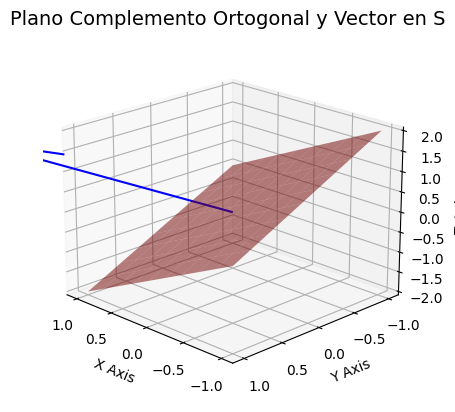

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir el vector en S
v_s = np.array([1, 1, 1])

# Puntos que satisfacen x + y + z = 0
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)
Z = -X - Y

# Dibujar el plano S^⊥
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=1, cstride=1, color='red', edgecolor='none')

# Dibujar el vector [1, 1, 1]
ax.quiver(0, 0, 0, v_s[0], v_s[1], v_s[2], color='blue', length=3, normalize=True)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Plano Complemento Ortogonal y Vector en S', fontsize=14)

# Configuración de la perspectiva
ax.view_init(elev=20, azim=135)

plt.show()

**Interpretación**

- **Gráfico**: El plano rojo representa $(S^\perp)$, que incluye todos los puntos $[x, y, z]$ tal que $x + y + z = 0$. El vector azul $[1, 1, 1]$ es ortogonal a este plano, y todos los vectores en el plano son ort

ogonales a $[1, 1, 1]$.

- **Aplicaciones**: El concepto de complementos ortogonales es fundamental en la solución de sistemas de ecuaciones lineales, en la teoría de proyecciones en espacios de Hilbert, y en el análisis de señales y procesamiento de imágenes.

Este ejemplo ilustra cómo el complemento ortogonal proporciona una herramienta poderosa para entender relaciones geométricas y algebraicas en espacios vectoriales.

### **15.1.10 Regla de la cadena multivariante**

La **regla de la cadena multivariante** es una generalización de la regla de la cadena unidimensional de cálculo diferencial, utilizada para funciones de múltiples variables. Esta regla es fundamental para realizar diferenciación en funciones compuestas donde tanto la función interna como la externa son funciones de varias variables.

**Concepto de la Regla de la Cadena Multivariante**

En el contexto de funciones de varias variables, consideremos una función compuesta $z = f(g(x, y), h(x, y))$ donde $(f)$ es una función de dos variables, y $(g)$ y $(h)$ son funciones de las variables $(x)$ y $(y)$. La regla de la cadena nos permite calcular derivadas parciales de $(z)$ respecto a $(x)$ y $(y)$ mediante la diferenciación de las funciones interiores y exteriores adecuadamente.

**Fórmula de la Regla de la Cadena Multivariante**

Supongamos que $z = f(u, v)$ y $u = g(x, y)$, $v = h(x, y)$. Las derivadas parciales de $(z)$ respecto a $(x)$ y $(y)$ se calculan como sigue:

$\frac{\partial z}{\partial x} = \frac{\partial f}{\partial u} \frac{\partial g}{\partial x} + \frac{\partial f}{\partial v} \frac{\partial h}{\partial x}$

$\frac{\partial z}{\partial y} = \frac{\partial f}{\partial u} \frac{\partial g}{\partial y} + \frac{\partial f}{\partial v} \frac{\partial h}{\partial y}$

Estas ecuaciones nos dicen cómo las tasas de cambio en $(g)$ y $(h)$ respecto a $(x)$ y $(y)$ afectan a $(z)$ a través de la función $(f)$.

**Ejemplo Ilustrativo**

Consideremos un ejemplo con funciones específicas:
- $f(u, v) = u^2 + v^2$

- $g(x, y) = x^2 + y^2$

- $h(x, y) = e^{x+y}$

Queremos encontrar $\frac{\partial z}{\partial x}$ y $\frac{\partial z}{\partial y}$.

**Cálculos Manuales**

**Calcular Derivadas Parciales de $(g)$ y $(h)$**:

   - $\frac{\partial g}{\partial x} = 2x$, $\frac{\partial g}{\partial y} = 2y$

   - $\frac{\partial h}{\partial x} = e^{x+y}$, $\frac{\partial h}{\partial y} = e^{x+y}$

**Calcular Derivadas Parciales de $(f)$** respecto a $(u)$ y $(v)$:

   - $\frac{\partial f}{\partial u} = 2u$, $\frac{\partial f}{\partial v} = 2v$

**Aplicar la Regla de la Cadena**:

   - $\frac{\partial z}{\partial x} = 2u \cdot 2x + 2v \cdot e^{x+y}$

   - $\frac{\partial z}{\partial y} = 2u \cdot 2y + 2v \cdot e^{x+y}$

**Código en Python para Demostración**

Implementemos el ejemplo en Python para visualizar las superficies resultantes de las funciones.

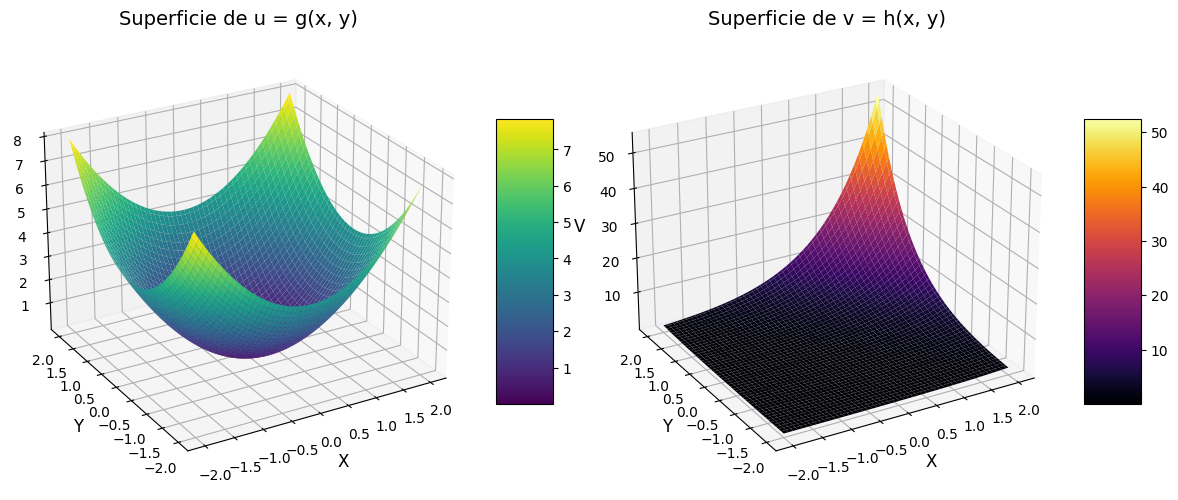

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(u, v):
    return u**2 + v**2

def g(x, y):
    return x**2 + y**2

def h(x, y):
    return np.exp(x + y)

x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
u = g(x, y)
v = h(x, y)
z = f(u, v)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(x, y, u, cmap='viridis', edgecolor='none')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title('Superficie de u = g(x, y)', fontsize=14)
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('U', fontsize=12)
ax1.view_init(elev=25, azim=-120)  # Adjust viewing angle for better visibility

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(x, y, v, cmap='inferno', edgecolor='none')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Superficie de v = h(x, y)', fontsize=14)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_zlabel('V', fontsize=12)
ax2.view_init(elev=25, azim=-120)

plt.tight_layout()
plt.show()

**Interpretación**

- **Visualización**: Los gráficos muestran las superficies de $(u)$ y $(v)$ como funciones de $(x)$ y $(y)$. Esto ayuda a visualizar cómo $(u)$ y $(v)$ varían en el espacio bidimensional definido por $(x)$ y $(y)$.

- **Derivadas**: La regla de la cadena multivariante nos permite descomponer el cálculo de las derivadas de $(z)$ en términos de las derivadas de $(u)$ y $(v)$ respecto a $(x)$ y $(y)$, facilitando la comprensión y el cálculo en casos complejos.

Este ejemplo ilustra cómo la regla de la cadena multivariante es fundamental en el cálculo diferencial para funciones de varias variables y tiene aplicaciones extensas en todas las áreas donde estas funciones son relevantes.

### **15.1.11 Multiplicadores de Lagrange**

Los **multiplicadores de Lagrange** son una técnica poderosa en cálculo para encontrar los máximos y mínimos de una función sujeta a una o más restricciones. Esta herramienta es fundamental en optimización y se utiliza ampliamente en economía, ingeniería, ciencias de la administración, y más.

**Concepto de Multiplicadores de Lagrange**

Supongamos que queremos maximizar o minimizar una función $f(x, y, \dots)$ sujeta a una restricción $g(x, y, \dots) = 0$. La idea de los multiplicadores de Lagrange es introducir una variable adicional, llamada **multiplicador de Lagrange** $(\lambda)$, y considerar la función de Lagrange:

$\mathcal{L}(x, y, \dots, \lambda) = f(x, y, \dots) - \lambda (g(x, y, \dots) - c)$

donde $(c)$ es el valor constante al que la restricción $(g)$ debe ser igual (a menudo $(c = 0)$).

**Cómo Funcionan los Multiplicadores de Lagrange**

Para encontrar los puntos críticos de $(f)$ bajo la restricción $(g)$, necesitamos resolver el sistema de ecuaciones dado por las derivadas parciales de $(\mathcal{L})$ respecto a cada variable, incluyendo $(\lambda)$:

$\frac{\partial \mathcal{L}}{\partial x} = 0, \quad \frac{\partial \mathcal{L}}{\partial y} = 0, \quad \dots, \quad \frac{\partial \mathcal{L}}{\partial \lambda} = 0$

El último de estos nos da la restricción original $g(x, y, \dots) = c$.

**Ejemplo Ilustrativo**

**Problema**: Maximizar la función $f(x, y) = xy$, sujeta a la restricción $x^2 + y^2 = 1$.

**Solución Matemática**

**Configurar la Función de Lagrange**:

   $\mathcal{L}(x, y, \lambda) = xy - \lambda (x^2 + y^2 - 1)$

**Derivadas Parciales**:

   - $\frac{\partial \mathcal{L}}{\partial x} = y - 2\lambda x = 0$

   - $\frac{\partial \mathcal{L}}{\partial y} = x - 2\lambda y = 0$

   - $\frac{\partial \mathcal{L}}{\partial \lambda} = x^2 + y^2 - 1 = 0$

**Resolver el Sistema de Ecuaciones**:

   - De las primeras dos ecuaciones, podemos obtener relaciones entre $(x)$, $(y)$, y $(\lambda)$.

   - Sustituir en la última ecuación para encontrar los valores específicos de $(x)$ y $(y)$.

**Código en Python y Visualización**

Máximo de xy: 0.500000000001157 en (x, y): [0.70710678 0.70710678]


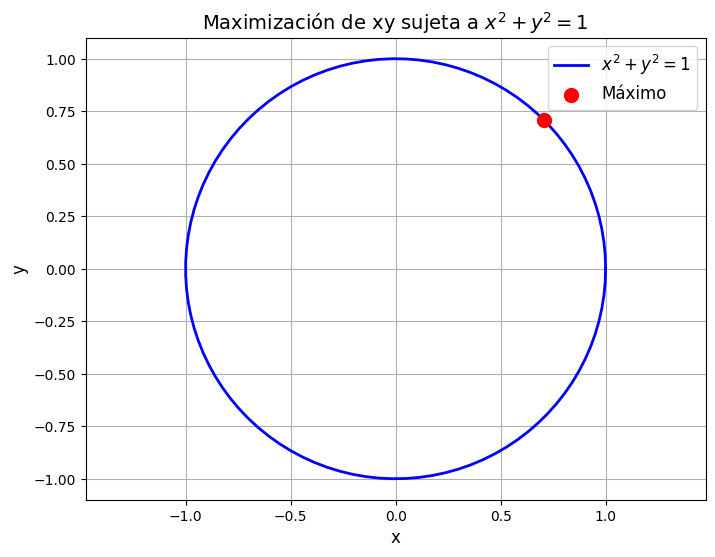

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definir la función objetivo y la restricción
def objective(vars):
    x, y = vars
    return -x * y  # Negativo porque queremos maximizar

def constraint(vars):
    x, y = vars
    return x**2 + y**2 - 1

# Condiciones iniciales
cons = {'type': 'eq', 'fun': constraint}
x0 = [0.5, 0.5]

# Ejecutar optimización
sol = minimize(objective, x0, constraints=cons)

# Imprimir resultados
print("Máximo de xy:", -sol.fun, "en (x, y):", sol.x)

# Visualización de la restricción y el punto máximo
theta = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(8, 6))
plt.plot(np.cos(theta), np.sin(theta), 'b-', linewidth=2, label='$x^2 + y^2 = 1$')  # Más visible
plt.scatter(sol.x[0], sol.x[1], color='red', s=100, zorder=5, label='Máximo')  # Más visible
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.axis('equal')
plt.legend(fontsize=12)
plt.title('Maximización de xy sujeta a $x^2 + y^2 = 1$', fontsize=14)
plt.grid(True)
plt.show()

**Interpretación**

- **Resultado de la Optimización**: El código encuentra el punto en el círculo $x^2 + y^2 = 1$ donde $(xy)$ es máximo.

- **Visualización**: La gráfica muestra el círculo de restricción y el punto óptimo donde se logra el máximo de la función objetivo.

Los multiplicadores de Lagrange son una herramienta extremadamente útil para resolver problemas de optimización con restricciones, permitiendo encontrar soluciones óptimas en situaciones complejas donde las técnicas sin restricciones no serían aplicables.

### **15.1.12 Práctica de la regla de la cadena**

La **regla de la cadena** es una técnica fundamental en cálculo diferencial que se utiliza para calcular la derivada de funciones compuestas. Es especialmente útil cuando se lida con funciones de múltiples variables o funciones compuestas por varias otras funciones. Aquí, te ofreceré una explicación detallada con ejemplos prácticos, incluyendo gráficas y fórmulas matemáticas, y un ejemplo implementado en Python.

**Concepto de la Regla de la Cadena**

La regla de la cadena permite calcular la derivada de una función compuesta. Si tienes una función $y = f(g(x))$, la derivada de $(y)$ respecto a $(x)$ usando la regla de la cadena es:

$\frac{dy}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}$

Este método se extiende a funciones de múltiples variables, donde la diferenciación se vuelve más compleja e involucra derivadas parciales.

**Ejemplo Unidimensional**

Supongamos que queremos diferenciar la función $y = \sin(e^x)$.

**Cálculo Matemático**

**Identificar las Funciones Internas**:

   - $u = e^x$ (función interna)

   - $y = \sin(u)$ (función externa)

**Derivar cada Función**:

   - $\frac{du}{dx} = e^x$

   - $\frac{dy}{du} = \cos(u)$

**Aplicar la Regla de la Cadena**:

   - $\frac{dy}{dx} = \cos(e^x) \cdot e^x$

**Ejemplo Multidimensional**

Considera la función $z = \sin(xy)$, donde deseas calcular $(\frac{\partial z}{\partial x})$ y $(\frac{\partial z}{\partial y})$ con $(x)$ y $(y)$ siendo independientes entre sí.

**Cálculo Matemático**

**Función Compuesta**: $z = \sin(u)$ con $u = xy$.

**Derivadas Parciales**:

   - $\frac{\partial u}{\partial x} = y$

   - $\frac{\partial u}{\partial y} = x$

   - $\frac{\partial z}{\partial u} = \cos(u)$

**Aplicar la Regla de la Cadena**:

   - $\frac{\partial z}{\partial x} = \cos(xy) \cdot y$

   - $\frac{\partial z}{\partial y} = \cos(xy) \cdot x$

**Implementación en Python y Visualización**

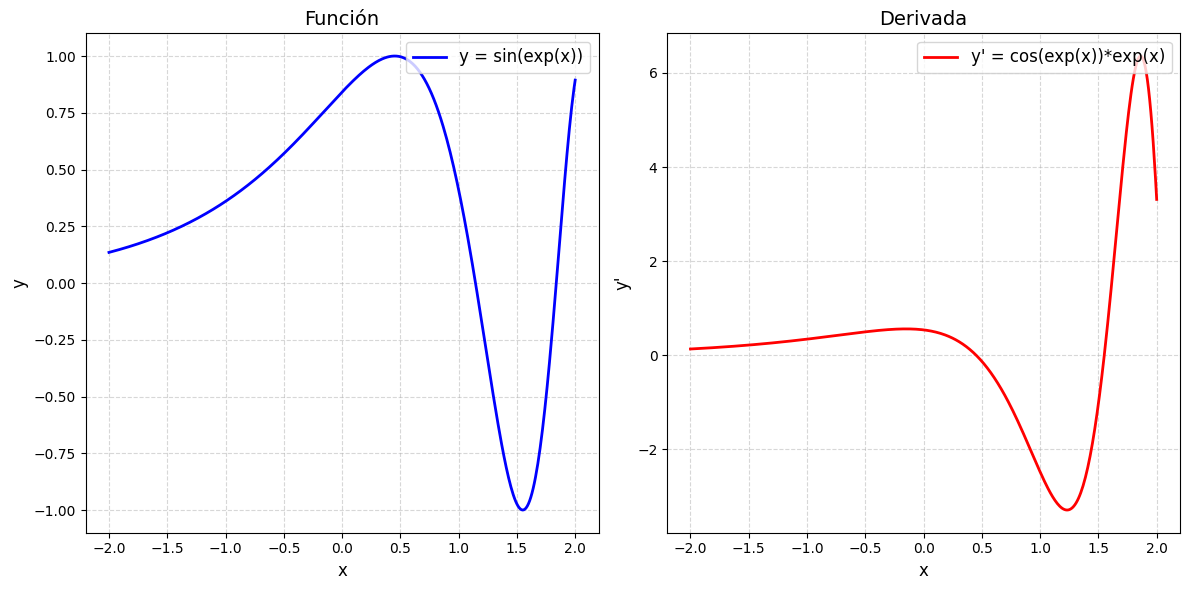

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y su derivada
def f(x):
    return np.sin(np.exp(x))

def df_dx(x):
    return np.cos(np.exp(x)) * np.exp(x)

# Generar datos para la gráfica
x_values = np.linspace(-2, 2, 400)
y_values = f(x_values)
dy_dx_values = df_dx(x_values)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='y = sin(exp(x))', color='blue', linestyle='-', linewidth=2)
plt.title('Función', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1, 2, 2)
plt.plot(x_values, dy_dx_values, label="y' = cos(exp(x))*exp(x)", color='red', linestyle='-', linewidth=2)
plt.title('Derivada', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel("y'", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

**Interpretación**

- **Gráficas**: La primera gráfica muestra la función $y = \sin(e^x)$, mientras que la segunda muestra su derivada calculada usando la regla de la cadena. Esto visualiza cómo la tasa de cambio de $(y)$ se comporta en relación a $(x)$.

La regla de la cadena es una herramienta invaluable en el cálculo diferencial, proporcionando un método para manejar funciones compuestas de manera efectiva, tanto para funciones simples como para aquellas más complejas involucrando múltiples variables.

### **15.1.13 Pasos del ACP**

El **Análisis de Componentes Principales (ACP)** es una técnica de reducción de dimensionalidad que se utiliza para simplificar la complejidad en conjuntos de datos de alta dimensión. Es fundamental en campos como machine learning, estadística, y ciencia de datos para visualización, compresión de datos y preprocesamiento antes de aplicaciones analíticas.

**Pasos del ACP**

El ACP transforma un conjunto de variables posiblemente correlacionadas en un conjunto de valores de dimensiones reducidas que son linealmente independientes (los componentes principales), ordenados por la cantidad de varianza original que cada uno captura.

Los pasos básicos para realizar ACP son:

**Estandarización de los Datos**

Dado que el ACP es afectado por la escala de las variables, el primer paso es estandarizar las variables para que tengan media 0 y desviación estándar 1. Esto es importante especialmente cuando las variables originales tienen diferentes unidades de medida.

**Cálculo de la Matriz de Covarianza**

Después de estandarizar los datos, calculamos la matriz de covarianza. Las entradas de esta matriz proporcionan las covarianzas (medidas de cómo cambian conjuntamente dos variables) entre cada par de variables del conjunto de datos.

**Cálculo de los Vectores Propios y los Valores Propios**

El siguiente paso es calcular los vectores propios y los valores propios de la matriz de covarianza. Los vectores propios representan las direcciones de los componentes principales, y los valores propios indican la cantidad de varianza capturada por cada componente.

**Ordenar los Vectores Propios**

Los vectores propios se ordenan por los valores propios en orden descendente para priorizar las principales componentes. Esto significa que el primer vector propio corresponde a la dirección de máxima varianza, y así sucesivamente.

**Proyección de los Datos**

Finalmente, los datos originales se proyectan sobre el espacio definido por los vectores propios seleccionados. Esto transforma los datos al nuevo sistema de coordenadas, reduciendo la cantidad de dimensiones y destacando la estructura más significativa de los datos.

**Ejemplo con Código Python**

A continuación, se muestra cómo realizar estos pasos utilizando un conjunto de datos simulado en Python:

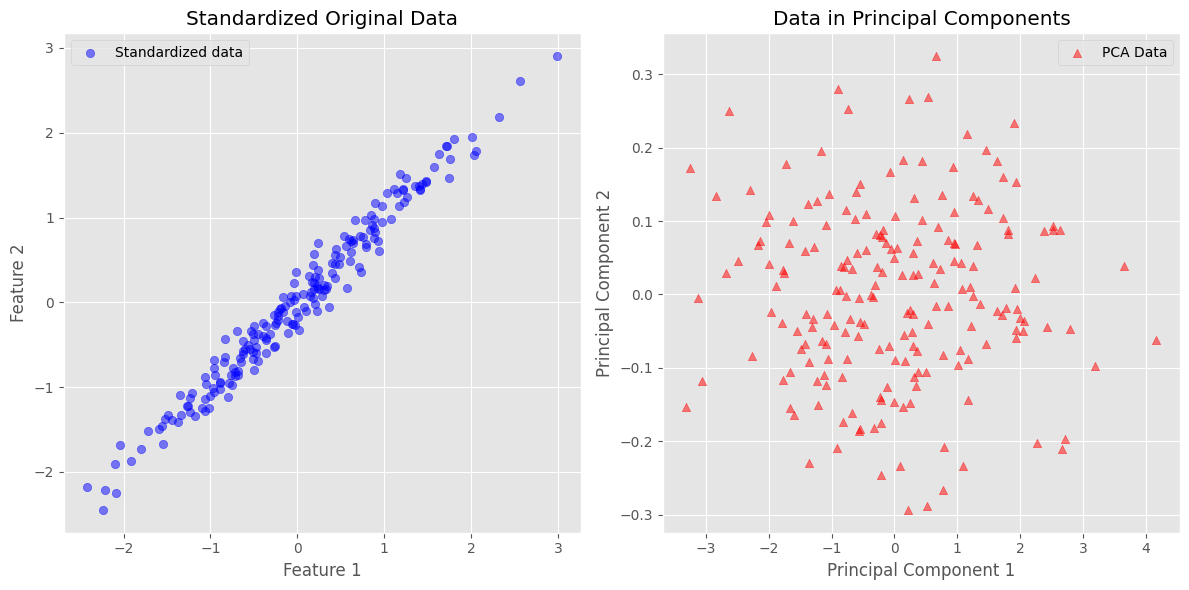

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generate simulated data
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_std)

# Transform the data to the principal component space
X_pca = pca.transform(X_std)

# Visualize
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')  # Setting a style for aesthetics

# Plotting original standardized data
plt.subplot(1, 2, 1)
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.5, color='blue', marker='o', label='Standardized data')
plt.title("Standardized Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()

# Plotting PCA transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, color='red', marker='^', label='PCA Data')
plt.title("Data in Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Interpretación**

- **Estandarización**: Los datos originales se estandarizan para asegurar que el ACP no esté sesgado por la escala de las variables.
- **ACP**: Se calculan los componentes principales y se observa cuánta varianza explica cada uno.
- **Visualización**: Los gráficos muestran los datos antes y después de aplicar ACP, destacando cómo el ACP captura la esencia de los datos al maximizar la varianza en las primeras componentes.

### **15.1.14 Análisis de componentes principales (ACP)**

El **Análisis de Componentes Principales (ACP)**, o Principal Component Analysis (PCA) en inglés, es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos mientras se retiene la mayor cantidad posible de información. Es particularmente útil en contextos donde se manejan grandes volúmenes de datos, permitiendo simplificar la complejidad visualizando y analizando los aspectos más significativos de los datos.

**Concepto de ACP**

El ACP transforma un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables no correlacionadas. Estas nuevas variables, llamadas **componentes principales**, se ordenan de modo que el primer componente principal tenga la mayor varianza posible, y cada componente subsiguiente tenga la mayor varianza posible bajo la restricción de ser ortogonal a los anteriores.

**Proceso Matemático del ACP**

**Estandarización de Datos**: Dado que las variables pueden tener diferentes unidades y escalas, es importante estandarizar los datos para que cada variable contribuya equitativamente al análisis. Esto se logra restando la media y dividiendo por la desviación estándar de cada variable.

**Matriz de Covarianza**: Se calcula la matriz de covarianza de los datos estandarizados para evaluar cómo cada variable varía con respecto a las otras.

**Valores Propios y Vectores Propios**: Se calculan los valores propios y los vectores propios de la matriz de covarianza. Los vectores propios definen las direcciones de los nuevos ejes del espacio de datos, y los valores propios asociados indican la cantidad de varianza que se puede atribuir a cada eje.

**Selección de Componentes Principales**: Los vectores propios se ordenan por sus valores propios en orden descendente. Se seleccionan los primeros vectores propios que corresponden a los mayores valores propios para formar los componentes principales.

**Transformación de Datos**: Finalmente, los datos originales son proyectados en el nuevo espacio definido por los componentes principales seleccionados.

**Ejemplo Práctico**

Imaginemos que tenemos un conjunto de datos sobre las propiedades físicas de varias muestras de un material, como la dureza, elasticidad, y densidad.

**Código en Python para ACP**

Aquí hay un ejemplo simplificado utilizando Python y la biblioteca `scikit-learn`, que implementa ACP para reducir un conjunto de datos tridimensional a dos dimensiones:

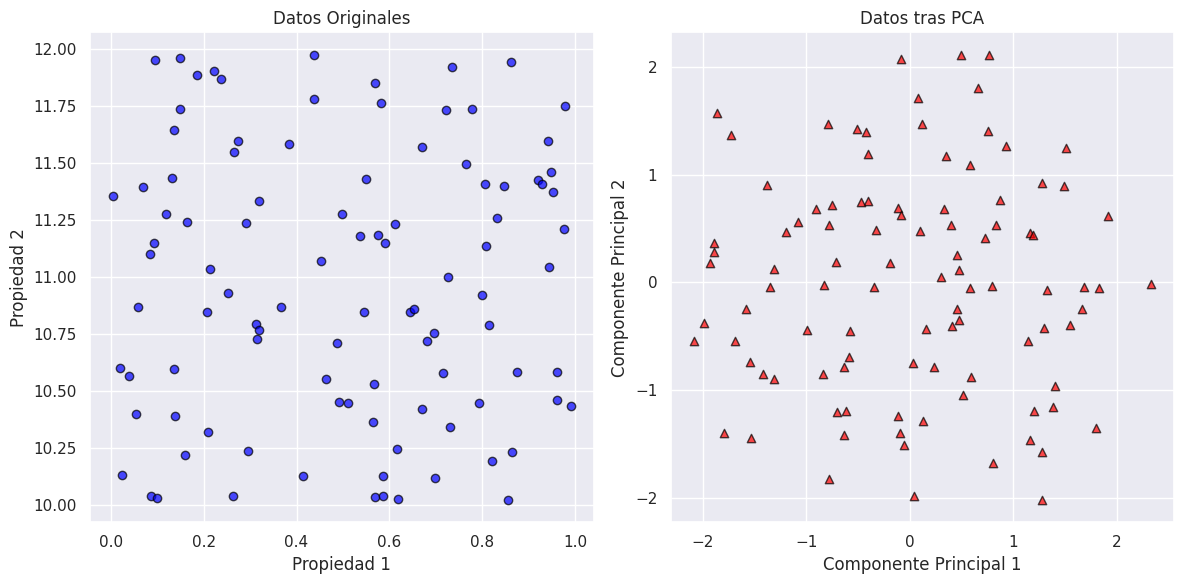

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Importar seaborn para gestionar estilos
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configurar el estilo visual usando Seaborn
sns.set(style="darkgrid")  # Aplica un estilo de cuadrícula oscura a los gráficos

# Simular datos
np.random.seed(0)
data = np.random.rand(100, 3)  # 100 muestras, 3 propiedades
data = data * np.array([1, 2, 3]) + np.array([0, 10, 100])  # Escalar y desplazar los datos

# Estandarizar los datos
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes
data_pca = pca.fit_transform(data_std)

# Visualización de los datos originales y los transformados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(data[:, 0], data[:, 1], color='blue', marker='o', edgecolor='black', alpha=0.7)
ax1.set_title('Datos Originales')
ax1.set_xlabel('Propiedad 1')
ax1.set_ylabel('Propiedad 2')

ax2.scatter(data_pca[:, 0], data_pca[:, 1], color='red', marker='^', edgecolor='black', alpha=0.7)
ax2.set_title('Datos tras PCA')
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

**Interpretación**

- **Datos Originales**: Se muestran las primeras dos dimensiones de los datos originales, donde las diferencias en escala y desplazamiento son evidentes.
- **Datos tras PCA**: Los datos transformados muestran cómo el ACP ha reorientado los datos a lo largo de las direcciones de máxima varianza, haciendo más evidentes las estructuras internas y las correlaciones entre variables.

El ACP es esencial para entender grandes conjuntos de datos, reduciendo el ruido y destacando las características más importantes. Es una herramienta valiosa en exploración de datos, preprocesamiento para aprendizaje automático, y análisis complejo en muchas disciplinas científicas y técnicas.

### **15.1.15 Demostraciones de PCA**

El **Análisis de Componentes Principales (PCA)** es una técnica estadística de reducción de dimensionalidad que se utiliza para identificar patrones en los datos y expresar esos datos en maneras que resalten sus similitudes y diferencias. Para entender completamente cómo funciona el PCA, es útil realizar una demostración paso a paso, mostrando tanto la teoría matemática subyacente como su implementación práctica en Python.

**Fundamentos Teóricos del PCA**

El PCA busca encontrar las direcciones (componentes principales) a lo largo de las cuales la varianza de los datos es máxima. Esto se hace siguiendo estos pasos fundamentales:

**Estandarización de Datos**: Asegurar que cada variable contribuye equitativamente al análisis al tener una media de 0 y una varianza de 1.

**Construcción de la Matriz de Covarianza**: La matriz de covarianza muestra cómo cambian las variables conjuntamente.

**Cálculo de los Valores Propios y Vectores Propios**: Los valores propios indican la cantidad de varianza capturada por cada componente principal, y los vectores propios son las direcciones de estos componentes en el espacio original.

**Ordenación y Selección de Componentes Principales**: Se seleccionan los componentes principales con los mayores valores propios.

**Transformación de Datos**: Los datos originales se proyectan en los componentes principales seleccionados.

**Ejemplo Matemático y Código Python**

Supongamos que tenemos un conjunto de datos de tres dimensiones y queremos reducirlo a dos dimensiones usando PCA.

**Simulación de Datos**

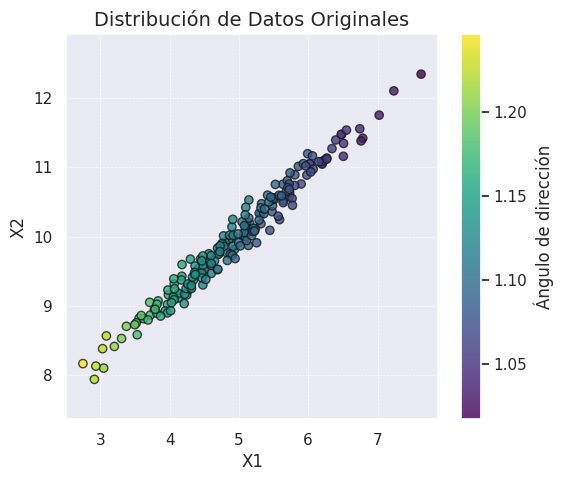

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generar datos simulados
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
mean = np.array([5, 10])
X += mean  # Añadir un desplazamiento

# Visualizar los datos originales
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=np.arctan2(X[:, 1], X[:, 0]), cmap='viridis', edgecolor='k', marker='o')
plt.title("Distribución de Datos Originales", fontsize=14)
plt.xlabel("X1", fontsize=12)
plt.ylabel("X2", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axis('equal')
plt.colorbar(label='Ángulo de dirección')
plt.show()

**Estandarización y PCA**

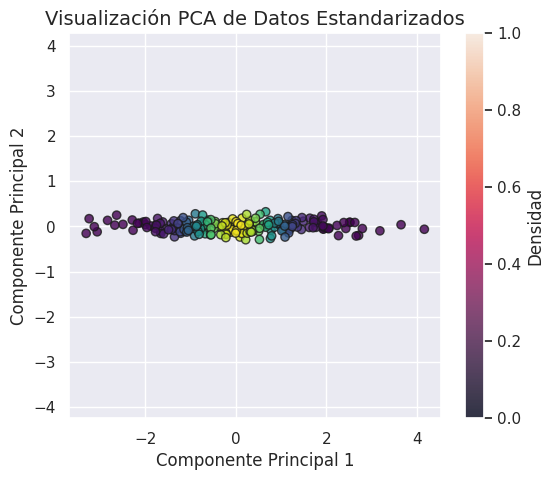

Varianza explicada por cada componente: [0.99287443 0.00712557]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Simular datos
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
X += np.array([5, 10])  # Añadir un desplazamiento

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Visualizar los datos en el espacio de componentes principales
plt.figure(figsize=(6, 5))
densities = np.exp(-X_pca[:, 0]**2 - X_pca[:, 1]**2)  # Ejemplo de densidad simulada
colors = cm.viridis(densities)  # Aplicar mapa de colores
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=colors, edgecolor='k')
plt.colorbar(label='Densidad')
plt.title("Visualización PCA de Datos Estandarizados", fontsize=14)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
plt.grid(True)
plt.axis('equal')
plt.show()

# Explicar varianza
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

**Interpretación**

- **Datos Originales**: La primera gráfica muestra los datos en su espacio original. La estructura y correlaciones internas pueden no ser claras a simple vista.

- **Datos Transformados**: En el espacio de componentes principales, los datos están alineados a lo largo de los ejes que maximizan la varianza, lo cual es evidente en la segunda gráfica. Este espacio facilita la identificación de patrones y la reducción de dimensionalidad.

- **Varianza Explicada**: Los valores de `explained_variance_ratio_` indican cuánto de la varianza total de los datos originales está capturada por cada componente principal. Este resultado ayuda a decidir cuántos componentes retener para la mayoría de las aplicaciones prácticas.

El PCA es una herramienta poderosa en análisis de datos, particularmente útil para visualización, compresión de datos, y preprocesamiento para otras técnicas analíticas y de machine learning. Este enfoque metodológico proporciona una base sólida para explorar grandes conjuntos de datos y descubrir estructuras subyacentes complejas de manera eficiente.

| **Inicio** | **atrás 14** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./14_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|